# Ising Model
Ising model is one of the more famous models in statistical physics. The system studied in the model has 'spins' located at vertices of a (possibly infinite) lattice, and spins interact with their neighbours using a specific rule (like spins stabilize the energy and unlike spins destabilize the energy) and iteract with external field B; thus  the energy of the system is given as: 
$$ U = - \sum_i B\sigma_i - \frac{1}{2} \sum_{\langle i,j \rangle} J \sigma_i \sigma_j
$$
In the simple version of the model, $\sigma_i = \pm 1$, and system is maintained at temperature $T$; the probability of a particular configuration is given by the Boltzmann Probability Law:
    $$ P(\{\sigma_i\}_{i=1}^N) \propto \exp\left[-\beta U(\{\sigma_i\})\right]
$$

Clearly the probability is then given by 
$$ P(\{ \sigma_i\}_{i=1}^N) \propto \exp\left[ \frac{B}{kT} \sum_i \sigma_i + \frac{J}{2kT}\sum_{\langle i,j\rangle} \sigma_i \sigma_j    \right]
$$
and hence depends on numerical values of  $\frac{B}{kT}$ and $\frac{J}{2kT}$. 

## Periodic Boundary Conditions
To simulate a infinite system, it is common to use Periodic Boundary Conditions (PBC). As illustraition consider 1-dimensional (1D) lattice, which is nothing but a straight line, with $N$ spins placed with equal spacing between two contigious spins. This chain of spins has left-end and right-end making this a finite system; however if we place this chain of spins on a circle such that in addition to requiring that distance between contigious spins is 1 unit, we require the distance betwen left-end and right-end of chain is 1 unit. We now see that the chain becomes *infinite*.

You can imagine similar trick in 2 dimensions, by requiing PBC in x-direction and y-directions. And, in 3-dimensions, requiring PBC in x-direction, y-direction and z-directions. 

### A specific trick applicable only for Ising Model for periodic boundary conditions
Add one extra row and one extra column to the configuration; the additional column/row is the copy of first column/row. 

## For Ising model, write following functions. Assume 2-dimensional model.
Set $J=1$ without loss of generality. See http://web.mit.edu/krish_s/www/files/ising_Model.pdf  page-27 has $m\, vs\, T$ plot

1. Write function to compute energy (using periodic boundary conditions): `Ising2D_Energy`
3. Write a function for magnetisation `Ising_Magnetisation` for $m(T,B)$
4. Write a function for computing heat capacity `Ising_HeatCapacity` for $C_V(T,B)$: $$C_V = \frac{1}{k_B T^2}\langle (E-\bar{E})^2\rangle = \frac{1}{k_B T^2} \left( \langle E^2 \rangle - \langle E \rangle^2 \right)$$
5. Write a function `Ising_SingleFlip_Metropolis` to perform one step of Metroplis Monte Carlo simulation
6. Write a function  `Ising_StoreConfig` to store configuration
7. Perform Monte Carlo Simulation of Ising Model
8. Plot $m(T,B=0)$ vs. $kT/J$. Hint: $kT/J \approx 2.5$ for critical temperature of Ising model. 

In [3]:
import numpy as np
import math
import scipy.constants
import matplotlib.pyplot as plt

In [13]:
class Ising2D:
    def __init__(self, pbX, pbY, kT=0.5, B=0, J=1, **kwargs):
        self.B=B
        self.kT=kT
        self.J=J
        self.pbX=pbX
        self.pbY=pbY
        self.N=pbX*pbY
        if kwargs:
            self.config=kwargs['config']
        else:
            self.config=np.random.choice([-1, 1], (pbX, pbY))
        self.E=self.energy()
        self.M=self.magnetisation()
        self.mu=1.2*10**(-6)
    
    def energy(self):
        '''Energy of a given configuration'''
        config=self.config
        energy = 0
        for i in range(self.pbX):
            for j in range(self.pbY):
                S = self.config[i,j]
                nb = config[(i+1)%self.pbX, j] + config[i,(j+1)%self.pbY] + config[(i-1)%self.pbX, j] + config[i,(j-1)%self.pbY]
                energy += -nb*S*self.J
        energy/=2
        energy-=self.B*np.sum(config)
        self.E=energy
        return energy
        
    def magnetisation(self):
        return np.sum(self.config)/self.N
    
    def MC_SingleSpinFlip(self, T):
            '''One run of MC'''
            a = np.random.randint(0, self.pbX)
            b = np.random.randint(0, self.pbY)
            config = self.config
            n = self.pbX
            m = self.pbY

            # Select spin at random
            j = np.random.randint(0, m)
            i = np.random.randint(0, n)

            # Calculate energy before flip
            nb = config[(i+1)%self.pbX, j] + config[i,(j+1)%self.pbY] + config[(i-1)%self.pbX, j] + config[i,(j-1)%self.pbY]
            nb = nb*config[i][j]*self.J
            delE = 2*nb
            p_acc = min(1, math.exp(-delE/(T)))
            if p_acc > np.random.rand():
                self.config[i][j]*=-1
                self.E+=delE
                self.M+=2*self.config[i][j]/self.N


In [14]:
model = Ising2D(50, 50)

In [15]:

T=np.linspace(0.2, 5, 100)
M=[]
E=[]
C=[]
for t in range(100):
    m=0
    e=0
    e2=0
    for i in range(1000):
        print(T[t])
        model.MC_SingleSpinFlip(T[t])  # Monte Carlo moves
        m+=model.M
        e+=model.E
        e2+=model.E*model.E
    m/=1000
    e/=1000
    M.append(m)
    E.append(e)
    c=(e/1000-e2/1000000)/(t*t)
    C.append(c)

0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2


/home/shivansh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars



0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.2484848484848485
0.248484848

0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.296969696969697
0.29696969

0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546
0.34545454545454546


0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939393939
0.3939393939

0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244
0.44242424242424244


0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909090909
0.4909090909

0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393939394
0.5393939393

0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.6363636363

0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848484848
0.6848484848

0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333333334
0.7333333333

0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818181817
0.7818181818

0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787878789
0.8787878787

0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272727272
0.9272727272

0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757575758
0.9757575757

1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242424242
1.0242424242

1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727272728
1.0727272727

1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696969697
1.1696969696

1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.218181818181818
1.21818181

1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666666666
1.2666666666

1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636363635
1.3636363636

1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.412121212121212
1.41212121

1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606060605
1.4606060606

1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.509090909090909
1.50909090

1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575757576
1.5575757575

1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545454545
1.6545454545

1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.703030303030303
1.70303030

1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8
1.8


1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.896969696969697
1.89696969

1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.993939393939394
1.99393939

2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424242425
2.0424242424

2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.090909090909091
2.09090909

2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.187878787878788
2.18787878

2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363636363
2.2363636363

2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.284848484848485
2.28484848

2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333

2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.381818181818182
2.38181818

2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303030306
2.4303030303

2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.478787878787879
2.47878787

2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.575757575757576
2.57575757

2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242424245
2.6242424242

2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.721212121212121
2.72121212

2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.76969696969697
2.769696969696

2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666666667
2.8666666666

2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151515155
2.9151515151

2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.963636363636364
2.96363636

3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.060606060606061
3.06060606

3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090909093
3.1090909090

3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.206060606060606
3.20606060

3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.254545454545455
3.25454545

3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515151516
3.3515151515

3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000000004
3.4000000000

3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.496969696969697
3.49696969

3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454545454
3.5454545454

3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424242426
3.6424242424

3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.690909090909091
3.69090909

3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.787878787878788
3.78787878

3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363636364
3.8363636363

3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333333336
3.9333333333

3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.981818181818182
3.98181818

4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.078787878787879
4.07878787

4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.127272727272727
4.12727272

4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.224242424242425
4.22424242

4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727272725
4.2727272727

4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.36969696969697
4.369696969696

4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.418181818181818
4.41818181

4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.515151515151516
4.51515151

4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636363635
4.5636363636

4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.660606060606061
4.66060606

4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.709090909090909
4.70909090

4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.806060606060607
4.80606060

4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545454545
4.8545454545

4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.951515151515152
4.95151515

5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0


Text(0, 0.5, 'Magnetisation')

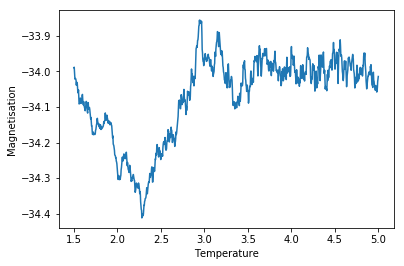

In [7]:
plt.plot(T, M)
plt.xlabel('Temperature')
plt.ylabel('Magnetisation')

Text(0, 0.5, 'Cv')

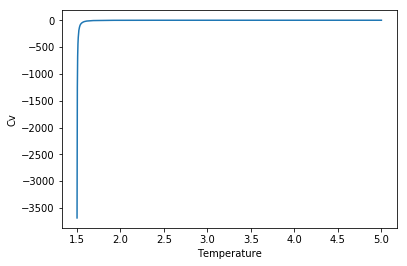

In [198]:
plt.plot(T, C)
plt.xlabel('Temperature')
plt.ylabel('Cv')

Text(0, 0.5, 'Energy')

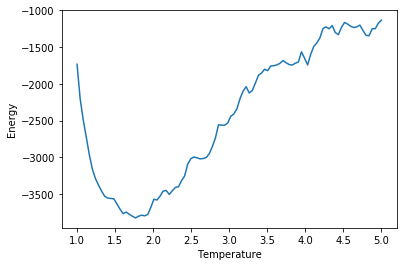

In [195]:
plt.plot(T, E)
plt.xlabel('Temperature')
plt.ylabel('Energy')